# Examen Práctico 

#### 3670 COM:01-3900 | Ciencia de datos | 2024 C2

Alumnos: Martin Lecuona, Rojas Tomas

## Enunciado

Se tiene un dataset con datos del historial de solicitantes a quienes se le otorgaron créditos y su situación final como deudores o pagadores. La entidad tiene que determinar a quienes entregar o no un crédito en función de su propensión a caer en "default". Desarrolle un proceso que clasifique deudores y pagadores. Observe que la clase de interés es "default", y debido a nuevas políticas de encaje bancario se ha expresado el objetivo de evitar tanto como sea posible entregar créditos a deudores (a costa naturalmente de perder algún posible crédito a pagadores). Maximice la métrica correspondiente sin modificar threshold.

 Las columnas tienen nombres descriptivos, pero para mas información:

Importe: Cuando dinero esta pidiendo prestado</BR>
añosPago: Tiempo para pagar el crédito</BR>
IngresoAnuales: Ingresos anuales del solicitante</BR>
RelacionIngresoDeuda: Ratio entre sus ingresos y la deuda</BR>
RelacionCuotaDeuda: Ratio entre sus ingresos y la cuota</BR>
PendienteEnTarjeta: Pendiente de pago en tarjetas de crédito</BR>
UsoCreditoTarjeta: Volumen de dinero que maneja con sus instrumentos de crédito</BR>
Objetivo: ¿Para que quiere el préstamos?</BR>
esPropietario: ¿Es propietario del su casa?</BR>
FueVeraz: ¿Alguna vez estuvo en el veraz?</BR>
TuvoEmbargo: ¿Tuvo algun embargo o situación judicial?</BR>
Cuentas: Cantidad de cuentas que maneja</BR>
PuntuacionGeneral: Puntuación crediticia otorgada por un organismo regular</BR>
Default: Si pagó o no el crédito</BR>
AntiguedadLaboral: Antiguedad laboral</BR>

## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general. 

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR> 



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente, recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos. Ej: "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si EVALUACION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa línea y la predición final (Evitando al fuga de datos).Puede dejar funcionando implementaciones alternativas que no prosperaron en notebooks separados. En cuanto comience con el desarrollo informe a los docentes el nombre del repositorio.


In [108]:
STUDENTDATAFILE = 'creditos_banco_alumnos.csv'
EVALDATAFILE    = 'creditos_banco_evaluacion.csv'
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np


In [109]:
df = pd.read_csv(STUDENTDATAFILE)
df.head()

,Importe,añosPago,IngresoAnuales,RelacionIngresoDeuda,RelacionCuotaDeuda,PendienteEnTarjeta,UsoCreditoTarjeta,Objetivo,esPropietario,FueVeraz,TuvoEmbargo,Cuentas,PuntuacionGeneral,Default,AntiguedadLaboral
0,2000,3,37000,6.29,2.22551,9663,96.6,Deuda,Hipoteca,0,0,2,4.4,paid off,2
1,28625,5,64000,15.34,14.07690,20084,60.3,Deuda renovable,Hipoteca,0,0,18,3.8,paid off,3
2,10400,3,76000,15.11,5.71753,4808,40.1,Deuda,Alquiler,0,1,8,4.4,paid off,7
3,33425,5,75000,20.85,14.08580,25807,60.7,Deuda,Hipoteca,0,1,14,4.0,paid off,11
4,15000,5,55000,7.66,9.43025,8452,49.4,Deuda,Alquiler,1,1,10,1.4,default,4


# Etapa de preprocesamiento #
1. Verificamos valores nulos
2. Verificamos valores únicos
3. Utilizamos boxplot para encontrar posibles outliers
4. Eliminar outliers

#### Verificamos valores nulos

In [110]:
#Verificamos valores nulos
print(df.isnull().sum()/len(df)*100)
# No se encontraron valores nulos en las columnas, por lo tanto no imputamos

Importe                 0.0
añosPago                0.0
IngresoAnuales          0.0
RelacionIngresoDeuda    0.0
RelacionCuotaDeuda      0.0
PendienteEnTarjeta      0.0
UsoCreditoTarjeta       0.0
Objetivo                0.0
esPropietario           0.0
FueVeraz                0.0
TuvoEmbargo             0.0
Cuentas                 0.0
PuntuacionGeneral       0.0
Default                 0.0
AntiguedadLaboral       0.0
dtype: float64


#### Verificamos valores únicos

In [111]:

# Resumen de estadísticas
print("\nResumen de estadísticas numéricas:")
print(df.describe())
print("\nResumen de estadísticas categóricas:")
print(df.describe(include=['object']))

#Pasamos a numéricas


Resumen de estadísticas numéricas:
            Importe      añosPago  IngresoAnuales  RelacionIngresoDeuda  \
count  34006.000000  34006.000000    3.400600e+04          34006.000000   
mean   13172.604099      3.503441    6.813686e+04             16.110743   
std     8101.327372      0.868015    4.549577e+04              7.593360   
min      500.000000      3.000000    3.500000e+03              0.000000   
25%     7000.000000      3.000000    4.200000e+04             10.460000   
50%    11500.000000      3.000000    6.000000e+04             16.010000   
75%    18000.000000      5.000000    8.200000e+04             21.560000   
max    35000.000000      5.000000    1.200000e+06             38.600000   

       RelacionCuotaDeuda  PendienteEnTarjeta  UsoCreditoTarjeta  \
count        34006.000000        3.400600e+04       34006.000000   
mean             8.026282        1.497325e+04          56.087961   
std              4.267497        2.108654e+04          25.437684   
min             

#### Analizamos posibles outliers con Boxplot

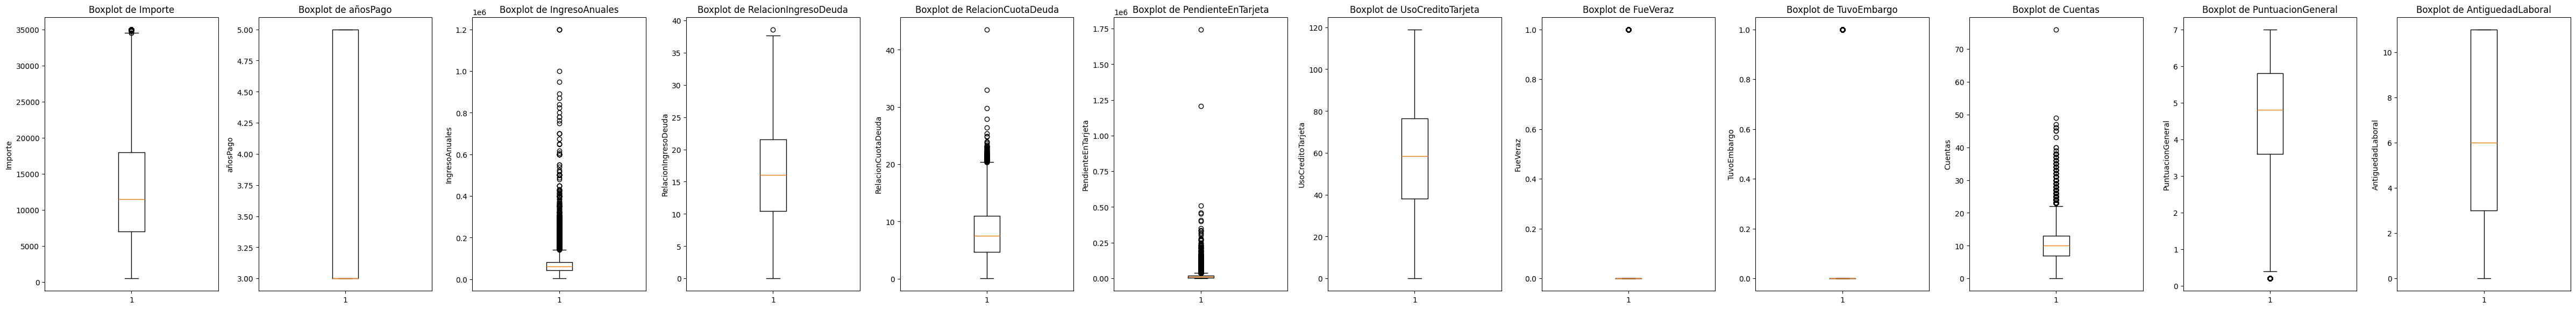

In [112]:
#Obtenemos únicamente las columnas que sean del tipo numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Número de columnas numéricas
n = len(numeric_columns)  

# Ajustar el tamaño
plt.figure(figsize=(4 * n, 6))  


for i, column in enumerate(numeric_columns):
    plt.subplot(1, n, i + 1) 
    plt.boxplot(df[column].dropna())  # Evitar NaN en el boxplot 
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### Detectamos outliers, por lo que intentamos limpiarlos usando IQR

In [113]:

df_numeric = df.select_dtypes(include=np.number)

#Elimanos columnas "binarias"

df_numeric.drop(columns=["FueVeraz"], inplace=True)
df_numeric.drop(columns=["TuvoEmbargo"], inplace=True)


Q1 = df_numeric.quantile(0.25)  
Q3 = df_numeric.quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtramos los datos y actualizamos el dataFrame. "~ Lo utilizamos para tomar los datos que deberiamos eliminar"
mask = ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)


df = df[mask].reset_index(drop=True)


print(df.head())

   Importe  añosPago  IngresoAnuales  RelacionIngresoDeuda  \
0     2000         3           37000                  6.29   
1    28625         5           64000                 15.34   
2    10400         3           76000                 15.11   
3    33425         5           75000                 20.85   
4    15000         5           55000                  7.66   

   RelacionCuotaDeuda  PendienteEnTarjeta  UsoCreditoTarjeta         Objetivo  \
0             2.22551                9663               96.6            Deuda   
1            14.07690               20084               60.3  Deuda renovable   
2             5.71753                4808               40.1            Deuda   
3            14.08580               25807               60.7            Deuda   
4             9.43025                8452               49.4            Deuda   

  esPropietario  FueVeraz  TuvoEmbargo  Cuentas  PuntuacionGeneral   Default  \
0      Hipoteca         0            0        2             

#### Volvemos a ver el Boxplot

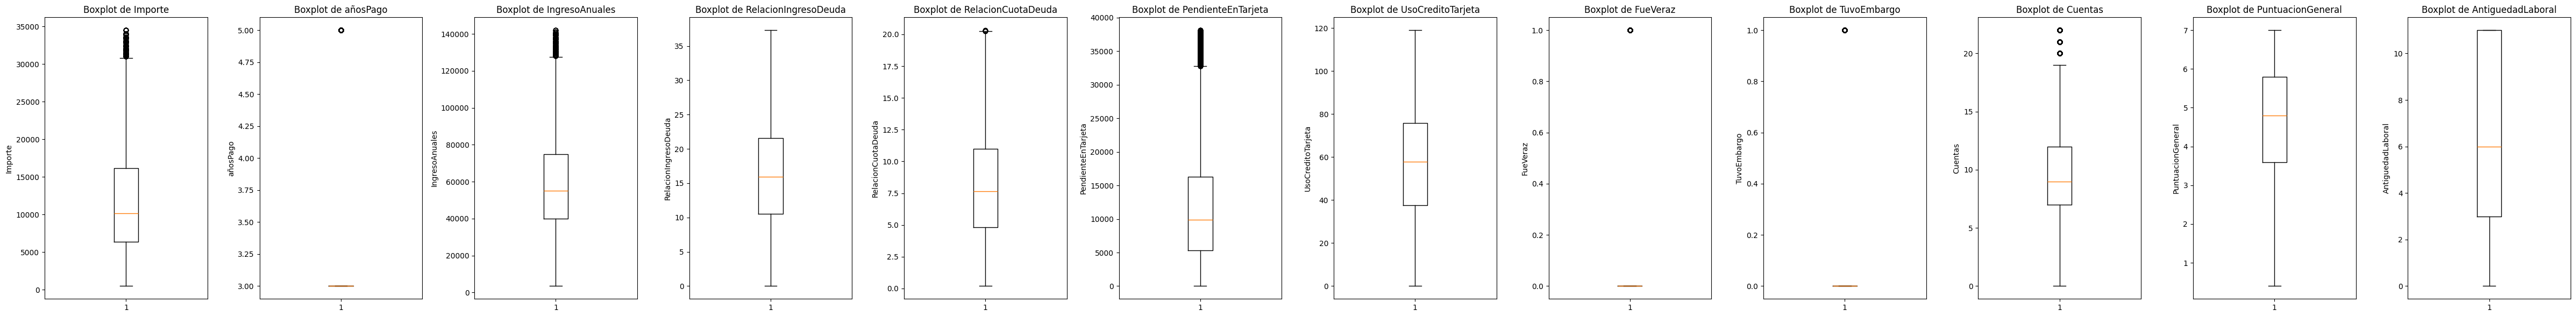

In [114]:
#Obtenemos únicamente las columnas que sean del tipo numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Número de columnas numéricas
n = len(numeric_columns)  

# Ajustar el tamaño
plt.figure(figsize=(4 * n, 6))  


for i, column in enumerate(numeric_columns):
    plt.subplot(1, n, i + 1) 
    plt.boxplot(df[column].dropna())  # Evitar NaN en el boxplot 
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


#### Se visualizan los datos con una distribución más equilibrada

## Balanceo de variable objetivo "Default"

In [115]:
print(df['Default'].unique())

['paid off' 'default']


In [116]:
balance_counts = df['Default'].value_counts()

# Mostrar los conteos absolutos
print("Conteos de cada clase:")
print(balance_counts)

balance_proportions = df['Default'].value_counts(normalize=True)
print("\nProporciones de cada clase:")
print(balance_proportions)

Conteos de cada clase:
Default
default     14937
paid off    14871
Name: count, dtype: int64

Proporciones de cada clase:
Default
default     0.501107
paid off    0.498893
Name: proportion, dtype: float64


#### Se puede ver que se encuentra balanceada la variable objetivo

In [117]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

X = df.drop(['Default'], axis=1)
y = df['Default']

df = X

numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

print(numerical_features)
print("----------")
print(categorical_features)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', MinMaxScaler())
# ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral'],
      dtype='object')
----------
Index(['Objetivo', 'esPropietario'], dtype='object')


In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Añade PCA al pipeline de preprocesamiento
pca_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('pca', PCA(n_components=0.70))  
])

# Integra PCA en el pipeline general
pipeline_knn_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('pca', pca_pipeline),  
    ('classifier', KNeighborsClassifier())  
])

pipeline_rf_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_pipeline),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced"))
])

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.2, random_state=42)

In [121]:
from sklearn.metrics import classification_report
# Entrenamos el modelo
pipeline_knn.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

pipeline_knn_pca.fit(X_train, y_train)
pipeline_rf_pca.fit(X_train, y_train)


# Evaluación
from sklearn.metrics import accuracy_score

y_pred_knn = pipeline_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

y_pred_knn_pca = pipeline_knn_pca.predict(X_test)
y_pred_rf_pca = pipeline_rf_pca.predict(X_test)

# Mejor Knn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 20], 
    'classifier__weights': ['uniform', 'distance'],        
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  
}

pipeline_knn_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Configuramos GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_knn_best,
    param_grid=param_grid,
    cv=5,               # Validación cruzada con 5 folds
    scoring='accuracy',  # Métrica de evaluación
    n_jobs=-1            # Usar todos los núcleos disponibles
)

grid_search.fit(X_train, y_train)
y_pred_knn_best= grid_search.predict(X_test)
pipeline_knn_best = grid_search.best_estimator_

c:\Users\marti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.5766162  0.57670009 0.58584236 0.58605206 0.59343283 0.59381027
 0.60236534 0.6024492  0.60626543 0.60723    0.61301693 0.61284921
 0.61825898 0.616875          nan 0.58512929        nan 0.59137796
        nan 0.59867484        nan 0.60592973        nan 0.60827812
        nan 0.61263954        nan 0.61913952 0.5766162  0.57670009
 0.58584236 0.58605206 0.59343283 0.59381027 0.60236534 0.6024492
 0.60626543 0.60723    0.61301693 0.61284921 0.61825898 0.616875  ]
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Objetivo', 'esPropietario'], dtype='object'))])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=20,
                                      weights='distance'))])

In [123]:
pipeline_knn_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance'))
])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir la cuadrícula de parámetros sin 'log_loss' y sin n_estimators en el clasificador inicial
param_grid_rf = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],
    'classifier__min_samples_split': [2, 4, 8, 10, 12, 14],
    'classifier__min_samples_leaf': [2, 4, 6, 8, 10],
    'classifier__max_features': ["sqrt", "log2", None],
    'classifier__n_estimators': [30, 60, 90, 120, 150, 180]
}

pipeline_rf_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight="balanced"))
])

rand_search = RandomizedSearchCV(
    estimator=pipeline_rf_best,
    param_distributions=param_grid_rf,  
    n_iter=50,  
    cv=5,               
    scoring='accuracy', 
    random_state=42,     
    n_jobs=-1            
)

rand_search.fit(X_train, y_train)
y_pred_rf_best = rand_search.predict(X_test)  
pipeline_rf_best = rand_search.best_estimator_

print("Random Forest - Mejor Estimador:")
print(pipeline_rf_best)


Random Forest - Mejor Estimador:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral']...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
              

## Validacion

In [126]:
from sklearn.metrics import classification_report

# Supongamos que ya tienes y_pred_knn, y_pred_rf, y_pred_knn_pca, y_pred_rf_pca definidos previamente

print("KNN")
print(classification_report(y_test, y_pred_knn))

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

print("MEJOR KNN")
print(classification_report(y_test, y_pred_knn_best))

print("MEJOR RANDOM FOREST")
print(classification_report(y_test, y_pred_rf_best))

print("Resultados KNN con PCA:")
print(classification_report(y_test, y_pred_knn_pca))

print("\nResultados Random Forest con PCA:")
print(classification_report(y_test, y_pred_rf_pca))


KNN
              precision    recall  f1-score   support

     default       0.60      0.57      0.59      2988
    paid off       0.59      0.61      0.60      2974

    accuracy                           0.59      5962
   macro avg       0.59      0.59      0.59      5962
weighted avg       0.59      0.59      0.59      5962

RANDOM FOREST
              precision    recall  f1-score   support

     default       0.63      0.65      0.64      2988
    paid off       0.63      0.61      0.62      2974

    accuracy                           0.63      5962
   macro avg       0.63      0.63      0.63      5962
weighted avg       0.63      0.63      0.63      5962

MEJOR KNN
              precision    recall  f1-score   support

     default       0.62      0.59      0.61      2988
    paid off       0.61      0.64      0.63      2974

    accuracy                           0.62      5962
   macro avg       0.62      0.62      0.62      5962
weighted avg       0.62      0.62      0.62   

## Cruzada

In [127]:
from sklearn.model_selection import cross_val_score

print("KNN PCA")
scores_knn_pca = cross_val_score(pipeline_knn_pca, X, y, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_knn_pca)
print("Precisión promedio con validación cruzada:", scores_knn_pca.mean())

print("RANDOM FOREST PCA")
scores_rf_pca = cross_val_score(pipeline_rf_pca, X, y, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_rf_pca)
print("Precisión promedio con validación cruzada:", scores_rf_pca.mean())

print("MEJOR KNN")
scores_knn_best = cross_val_score(pipeline_knn_best, X, y, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_knn_best)
print("Precisión promedio con validación cruzada:", scores_knn_best.mean())

print("RANDOM FOREST")
scores_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_rf)
print("Precisión promedio con validación cruzada:", scores_rf.mean())

print("MEJOR RANDOM FOREST")
scores_rf_best = cross_val_score(pipeline_rf_best, X, y, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_rf_best)
print("Precisión promedio con validación cruzada:", scores_rf_best.mean())


KNN PCA
Puntuaciones en cada fold: [0.59074136 0.59409594 0.59342503 0.59167925 0.59939607]
Precisión promedio con validación cruzada: 0.593867530202044
RANDOM FOREST PCA
Puntuaciones en cada fold: [0.62143576 0.62713854 0.62277759 0.61868814 0.62674048]
Precisión promedio con validación cruzada: 0.6233561029392606
MEJOR KNN
Puntuaciones en cada fold: [0.60986246 0.62294532 0.61741027 0.6165073  0.62221104]
Precisión promedio con validación cruzada: 0.6177872766969423
RANDOM FOREST
Puntuaciones en cada fold: [0.63686682 0.63955049 0.63200268 0.64301292 0.63764469]
Precisión promedio con validación cruzada: 0.6378155202149541
MEJOR RANDOM FOREST
Puntuaciones en cada fold: [0.63804093 0.6402214  0.64676283 0.63999329 0.65341386]
Precisión promedio con validación cruzada: 0.643686461158888


In [128]:
EVALUACION = False
best_clf = pipeline_rf #Asignar aqui el mejor clasificador posible (previamente entrenado)
#best_clf = pl
#Leemos el dataset de evaluación, simulando producción
if EVALUACION==False:
    df = pd.read_csv(STUDENTDATAFILE)
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv(EVALDATAFILE)
#Dividimos en target y predictoras

X_Eval = df.drop("Default", axis=1)
y_Eval = df["Default"]

#Evaluación final

y_pred = best_clf.predict(X_Eval) # esto debe ser un pipeline completo
print(classification_report(y_Eval, y_pred))

              precision    recall  f1-score   support

     default       0.88      0.91      0.90      5133
    paid off       0.91      0.87      0.89      5069

    accuracy                           0.89     10202
   macro avg       0.89      0.89      0.89     10202
weighted avg       0.89      0.89      0.89     10202

